# Mini Project 2 Exercise 3
David Strube - dstrube3@gatech.edu

# Abstract
The goal of this paper is to figure out how to create a solution to help reduce deaths, errors, and gaps as it pertains to COVID-19. Having reviewed the available datasets (HealthData.gov, 2021), first I will analyze the data, and then come up with a viable pitch. My analysis will tell a story that supports my pitch to build a solution related to the dataset. 

# Data Import
The following is the importing of data for COVID-19 US Deaths Overtime, either from a local file from the csv download from healthdata.gov (commented out), or from the URL from cdc.gov (active).



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#COVID-19 US Deaths Overtime
#https://healthdata.gov/dataset/united-states-covid-19-cases-and-deaths-state-over-time
#Import data using local file
#covid_19_US_Deaths = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv', header=0)
#Import data using URL
covid_19_US_Deaths = pd.read_csv('https://data.cdc.gov/api/views/9mfq-cb36/rows.csv?accessType=DOWNLOAD') 

print("Data import complete")

Data import complete


# Data cleanse
On to cleansing the data. First, I made a note of how many rows of data there were before I started cleansing the data: 23,820. Next, I noticed when I tried to print out the data in ascending or descending order, the dates were being ordered alphabetically, not chrnonologically. This had to be fixed.

After fixing that, I made note of how many rows there are after removing duplicates. The count was the same, so there are no duplicates.

Next, in counting the number of states, I found 60, not the expected 50. This is because the statese include territories like Federated States of Micronesia (FSM), and Northern Mariana Islands (MP), and Republic of the Marshall Islands (RMI). I figured out how many rows there are for some states in particular: Georgia, for example, has 397 rows. This is fine, but all other states I quieried also had the count of 397. If each state is reporting data on its own, it seems unlikely that they would all be reporting the same amount of data. Then it occurred to me: 397 * 60 = 23,820. All states are "reporting" data even if data may be empty.

In starting to clean the data, I found that one way to do it is to print out the head of data, look for columns with "NaN" as their value and set to removing their empty values. The columns I found using this method were: conf_cases, prob_cases, pnew_case, conf_death, prob_death, & pnew_death. However, I also found an easier way to do this is by calling the **dropna()** on the dataframe object. 

Removing rows with empty values brought the number of data rows down to 8,769. The number of states dropped to 29. The number of rows per state ranged from 57 (New Jersey) to 358 (North Carolina).


In [ ]:
#Count:
print("Number of uncleansed rows: " + str(len(covid_19_US_Deaths)))
print()
#23,820 rows

def printFirstAndLastDates():
  print("First 5 distinct submission_dates sorting by date, low to high: ")
  count = 0
  for submission_date in covid_19_US_Deaths.sort_values('submission_date')['submission_date'].drop_duplicates():
    count += 1
    if count > 5: 
      break
    print(submission_date)
  print()

  print("First 5 distinct submission_dates sorting by date, high to low: ")
  count = 0
  for submission_date in covid_19_US_Deaths.sort_values('submission_date', ascending=False)['submission_date'].drop_duplicates():
    count += 1
    if count > 5: 
      break
    print(submission_date)
  print()

printFirstAndLastDates()
#^Those both sort alphabetically before doing this:
print("Fixing dates to be sorted chronologically...")
covid_19_US_Deaths['submission_date'] = pd.to_datetime(covid_19_US_Deaths['submission_date'])
print("Done")
printFirstAndLastDates()

print("Number of rows with duplicates removed: " + str(len(covid_19_US_Deaths.drop_duplicates())))
print("Same as number from before = There are no duplicates")
print()

print("Number of states: " + str(len(covid_19_US_Deaths['state'].drop_duplicates() )))
#60 "states"

#List of uncleansed states includes territories like:
#FSM = Federated States of Micronesia (!= Flying Spaghetti Monster)
#MP = Northern Mariana Islands (Mariana Pacific?)
#RMI = Republic of the Marshall Islands

#covid_19_US_Deaths[covid_19_US_Deaths['state'] == 'GA'].sort_values('submission_date')
print("Number of uncleansed rows for GA " + str(len(covid_19_US_Deaths[covid_19_US_Deaths['state'] == 'GA'])))
#397 in GA

print("Number of rows for NYC:" + str(len(covid_19_US_Deaths[covid_19_US_Deaths['state'] == 'NYC'])))
print("Number of rows for FSM:" + str(len(covid_19_US_Deaths[covid_19_US_Deaths['state'] == 'FSM'])))
print("Number of rows for MP:" + str(len(covid_19_US_Deaths[covid_19_US_Deaths['state'] == 'MP'])))
print()
#Hmm, also 397...
#Ah:
#397 * 60 = 23,820

#Cleaning up the data
"""
covid_19_US_Deaths = covid_19_US_Deaths.loc[pd.notnull(covid_19_US_Deaths['conf_cases'])]
covid_19_US_Deaths = covid_19_US_Deaths.loc[pd.notnull(covid_19_US_Deaths['prob_cases'])]
covid_19_US_Deaths = covid_19_US_Deaths.loc[pd.notnull(covid_19_US_Deaths['pnew_case'])]
covid_19_US_Deaths = covid_19_US_Deaths.loc[pd.notnull(covid_19_US_Deaths['conf_death'])]
covid_19_US_Deaths = covid_19_US_Deaths.loc[pd.notnull(covid_19_US_Deaths['prob_death'])]
covid_19_US_Deaths = covid_19_US_Deaths.loc[pd.notnull(covid_19_US_Deaths['pnew_death'])]
"""
#Equivalent & superior alternative:
covid_19_US_Deaths = covid_19_US_Deaths.dropna()
print("Number of rows after data cleanse: " + str(len(covid_19_US_Deaths)))
#8769 rows
print("Number of states after data cleanse: " + str(len(covid_19_US_Deaths['state'].drop_duplicates() )))
#29 states
print()

for state in covid_19_US_Deaths.sort_values('state')['state'].drop_duplicates():
  rowCount = len(covid_19_US_Deaths[covid_19_US_Deaths['state'] == state])
  print("Rows for state " + state + ": " + str(rowCount))

print("Data cleanse complete")

Number of uncleansed rows: 23820

First 5 distinct submission_dates sorting by date, low to high: 
01/01/2021
01/02/2021
01/03/2021
01/04/2021
01/05/2021

First 5 distinct submission_dates sorting by date, high to low: 
12/31/2020
12/30/2020
12/29/2020
12/28/2020
12/27/2020

Fixing dates to be sorted chronologically...
Done
First 5 distinct submission_dates sorting by date, low to high: 
2020-01-22 00:00:00
2020-01-23 00:00:00
2020-01-24 00:00:00
2020-01-25 00:00:00
2020-01-26 00:00:00

First 5 distinct submission_dates sorting by date, high to low: 
2021-02-21 00:00:00
2021-02-20 00:00:00
2021-02-19 00:00:00
2021-02-18 00:00:00
2021-02-17 00:00:00

Number of rows with duplicates removed: 23820
Same as number from before = There are no duplicates

Number of states: 60
Number of uncleansed rows for GA 397
Number of rows for NYC:397
Number of rows for FSM:397
Number of rows for MP:397

Number of rows after data cleanse: 8769
Number of states after data cleanse: 29

Rows for state AL: 309

# Analysis

To assist with analysis of the data, I made a function called **graphStates** which would take in a dictonary of fields and labels and generate graphs of each state's total cases and total deaths over time. The findings are as follows:
- Alabama saw a sharp rise in cases from May to July 2020, then a leveling off in August, then a less sharp rise from September to November, then leveling off again. Number of deaths rose sharply from May 2020 to about December, then started leveling off.

- Arizona saw a sharp rise in cases from May to July 2020, and again from August to November, then leveling off in December, but seemed to have a slight uptick in February 2021. The number of deaths matched this pattern, but less dramatically.

- Colorado saw a sharp rise in cases from April to November 2020, then leveled off until a slight uptick in February 2021. There was a steady rise in deaths from April to June, then a sharp rise, then leveling off between November and December with slight uptick in starting in January 2021. Note, there seems to be a slight gap of data in December.

- Connecticut saw a sharp rise in cases from May to November 2020, then leveled off. The number of deaths rose slowly from April to June, then rose sharply until December, then leveled off.

- Deleware saw a sharp rise in cases from May to December 2020, then leveled off. The number of deaths rose slowly from May to June, there are a couple gaps between June and August, but there is clearly a sharp rise from July to December, then leveling off.

- Federated States of Micronesia had 0 cases until January 2021 when they got 1 case. There are no reported deaths there at this time.

- Georgia saw a sharp rise in cases from May to July 2020, then leveling off, then a rise from September to December, then leveling off again. The number of rose steadily from May to February, with a discrepancy in November when the number seems to have dropped slightly, presumably from some error in reporting.

- Idaho saw a nearly vertical rise in cases from April to July 2020, then a steady rise after that. The number of deaths followed this patten.

- Illinois a steady rise in cases from May 2020 to February 2021, rising slightly in June and leveling off slightly in November. The number of deaths followed this pattern with the rise in June and leveling off in November appearing a little more dramatically.

- Kentucky saw a sharp rise in cases from May to July 2020, then slowly leveled off. The number of deaths followed a similar pattern, although thankfully not as sharp a rise starting out.

- Massachusetts had a linear rise in cases from May to June 2020, then sharply rose from June to November, then leveled off. The number of deaths had a similar pattern, but not as sharp a rise between June and December.

- Maine saw a sharp rise in cases from May to November 2020, then leveled off. The number of deaths followed this pattern, although there seem to be some gaps in the data in December 2020 and January 2021.

- Michigan saw a sharp rise in cases from May to November 2020, then leveled off. The number of deaths rose slowly from May to June, then sharply from June to December, then leveled off.

- Northern Mariana Islands saw a linear rise in cases from May 2020 to February 2021. Only 2 deaths were reported over that time.

- Mississippi saw a linear rise in cases and deaths from May 2020 to February 2021.

- Montana saw a sharp rise in cases from May to November 2020 before leveling off. The number of deaths followed this pattern.

- North Carolina saw a sharp rise in cases from March to July 2020, then a linear rise before leveling off in November. The number of deaths on rose sharply from March to May, then followed the pattern of cases.

- New Jersey had some data in May, then a large gap from May 2020 to January 2021 when the data shows an increase in the number of cases and number of deaths similar to that found in other states. Note that this is in the data from healthdata.gov, whereas the data in the CDC's Provisional Death Counts for Coronavirus Disease 2019 (CDC 2021) is not missing.

- New York saw a sharp rise in cases between May and November 2020, the leveled off after that. The number of deaths had a sharp rise between July 2020 and January 2021. There was also a gap in the data in June.

- Ohio saw a sharp rise in cases from April to November 2020. The number of deaths rose less sharply compared to the number of cases, but still sharply between June and November. There seems to be some gaps in the death numbers data in February.

- Oklahoma saw a sharp rise in cases from April to July 2020, then a steady rise onward. The number of deaths follows this pattern. There seems to be a gap in the data around late November / early December.

- Oregon saw sharp rises in cases from May to July 2020 and from August to November, then leveled off. The number of deaths followed this pattern.

- Puerto Rico's data for cases seems erroneous. There was a sharp rise from May to August 2020, but then from October to December, there seem to be two conflicting sets of data overlapping each other. This is probably due to some error in data collection that was resolved in January 2021. The number of deaths rose sharply from May to August, then steadily onward.

- Republic of the Marshall Islands had 0 cases from May to November 2020, then 2 in November, and 4 in December. There were no deaths reported.

- Tennessee saw a sharp rise in cases from May to July 2020, then cases rose steadily after that. The number of deaths followed this pattern.

- Utah saw a sharp rise of cases from May to October 2020, then leveled off. The number of deaths followed this pattern.

- Virginia saw a steep linear rise of cases from April to November 2020, then leveled off. The number of deaths was bumpy, but also leveled off around the same time as the number of cases.

- Wisconsin saw a sharp rise of cases from May to November 2020, then leveled off, with a slight uptick in February. The number of deaths followed this pattern.

- Wyoming's pattern of cases and deaths is very similar to that of Wisconsin, except in in December the data for deaths gets a little spotty.

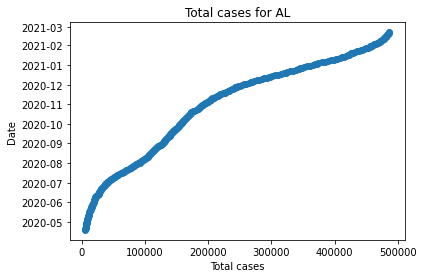

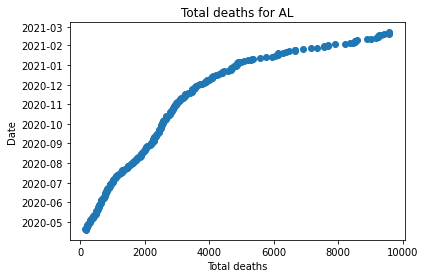

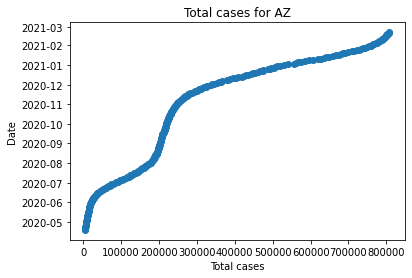

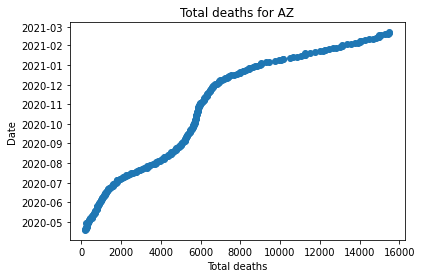

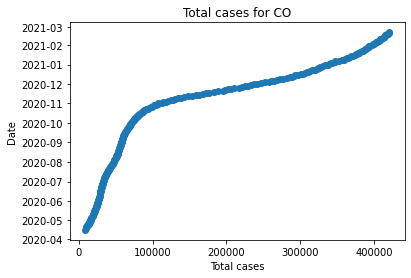

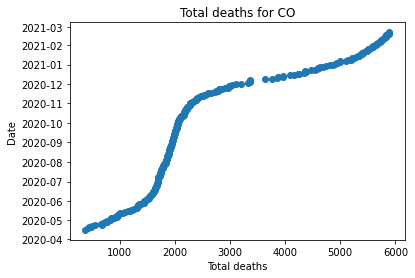

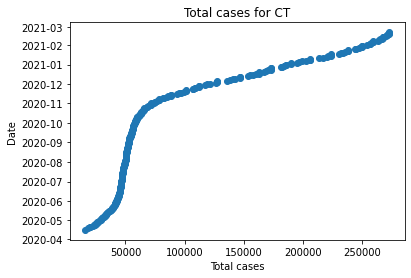

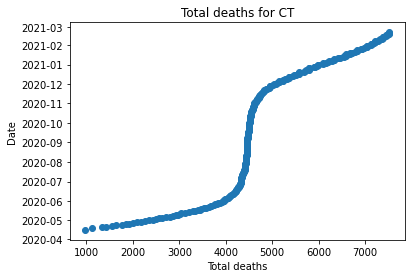

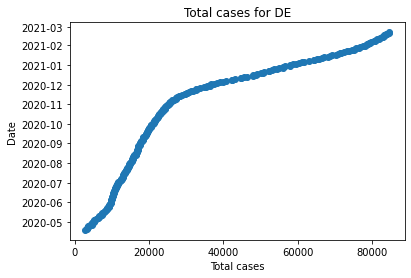

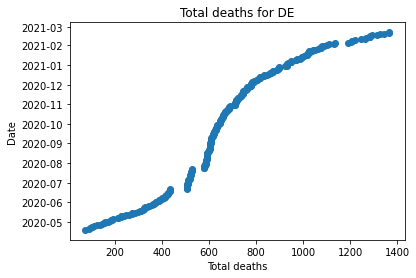

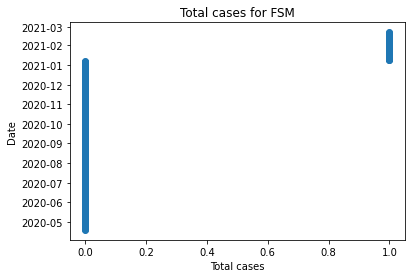

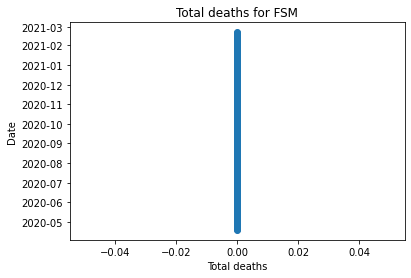

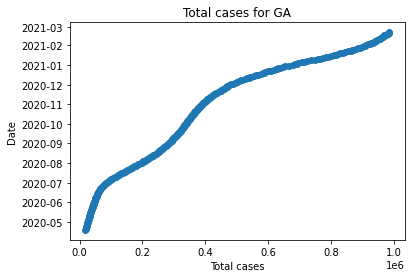

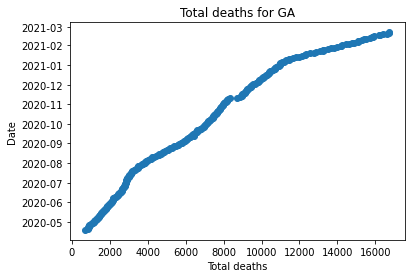

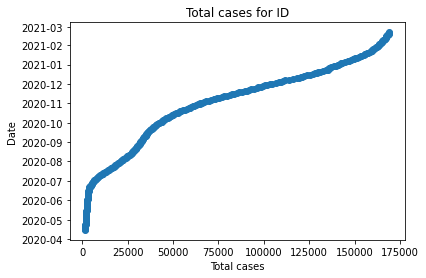

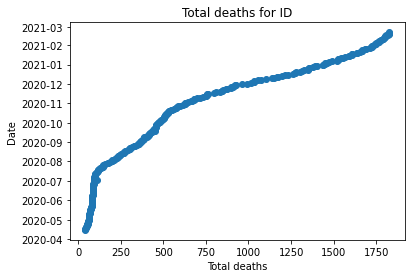

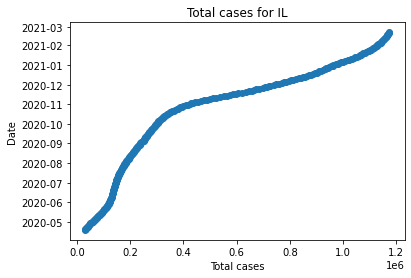

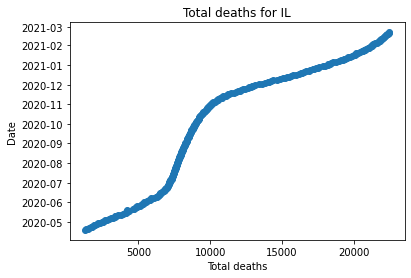

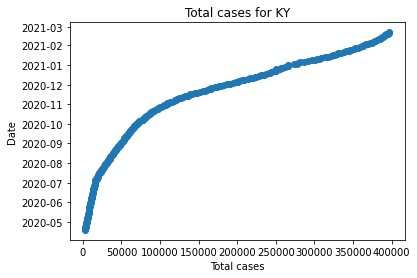

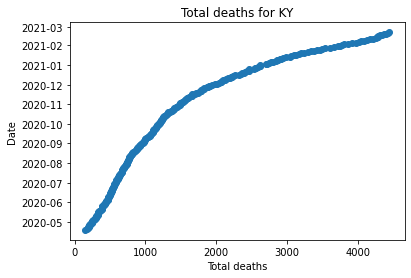

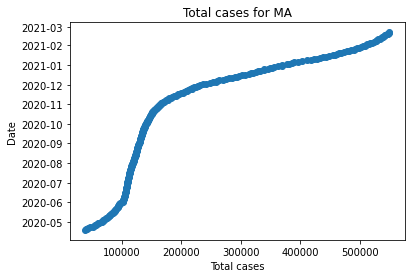

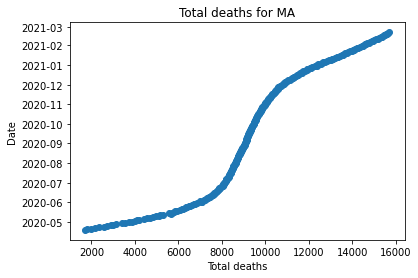

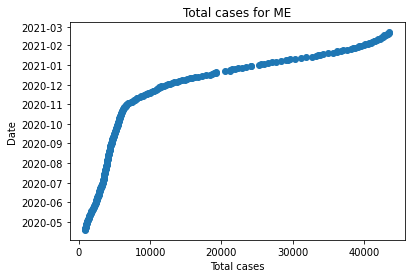

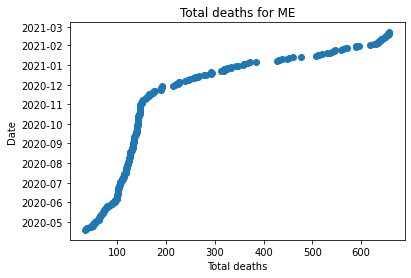

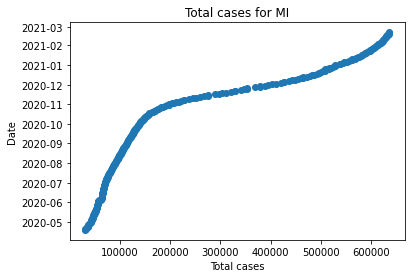

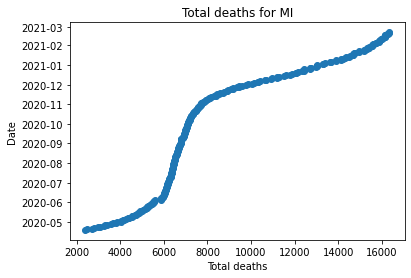

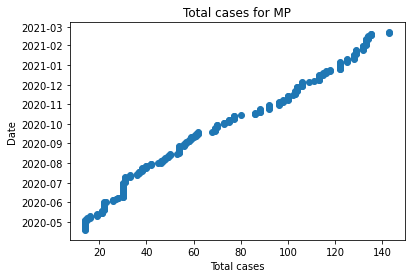

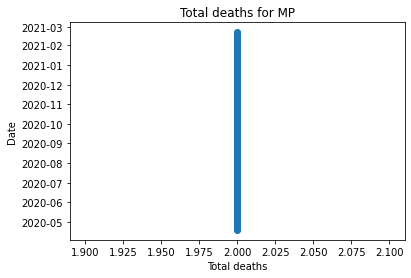

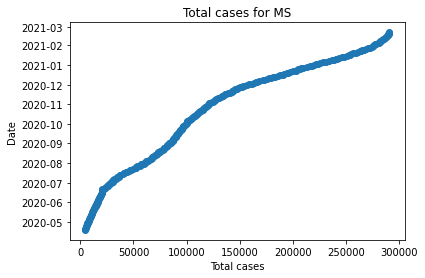

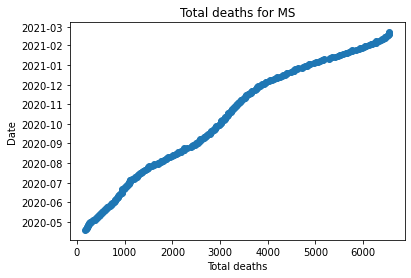

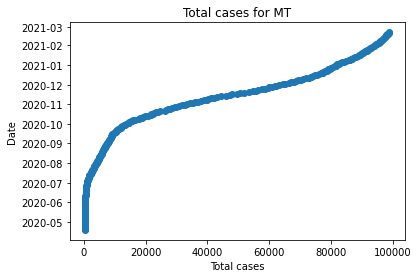

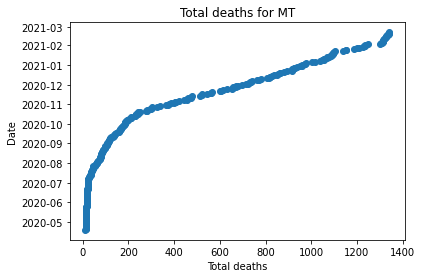

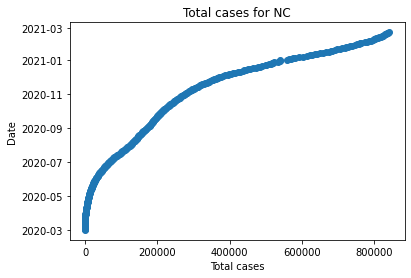

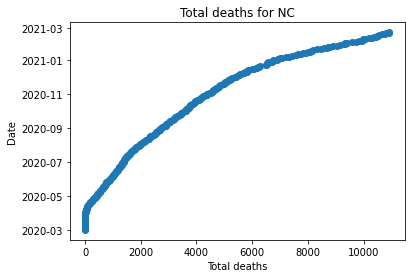

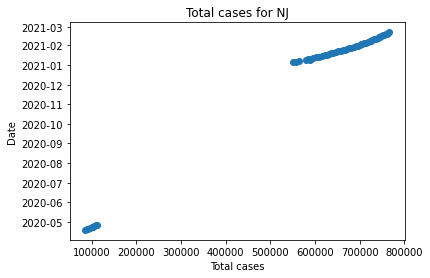

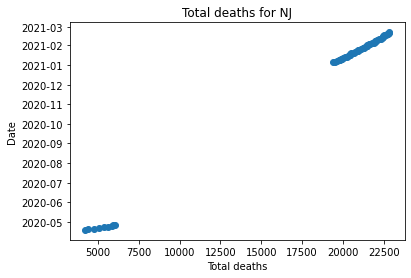

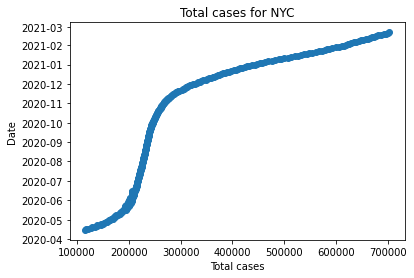

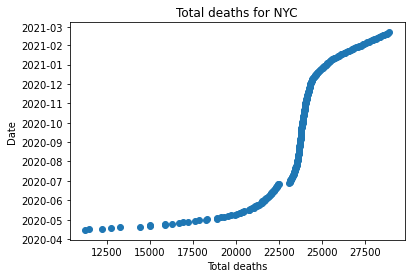

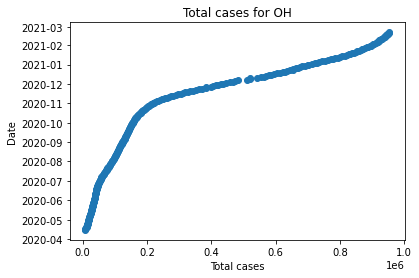

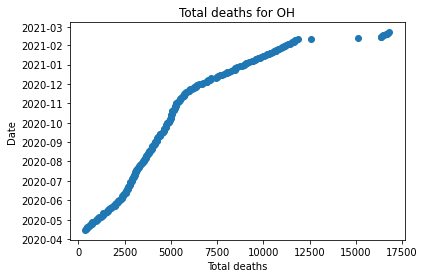

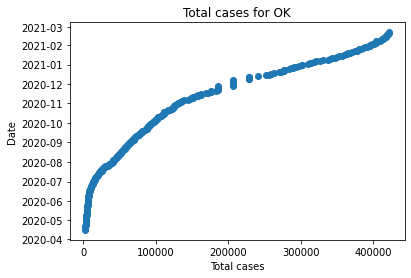

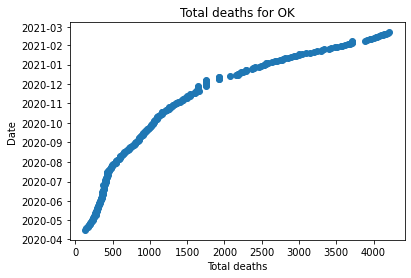

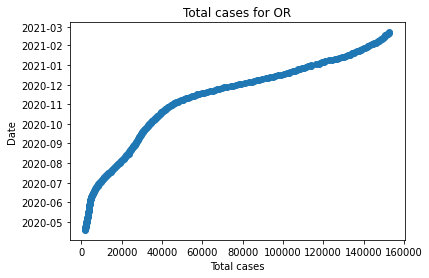

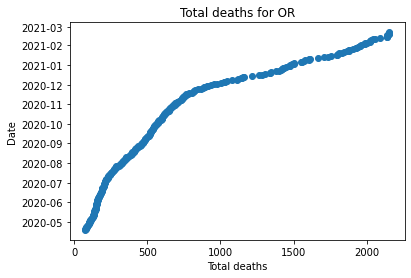

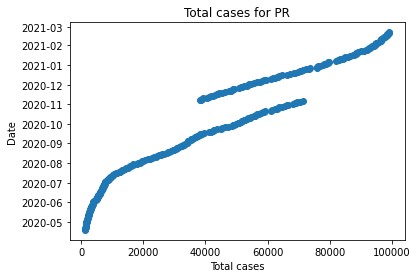

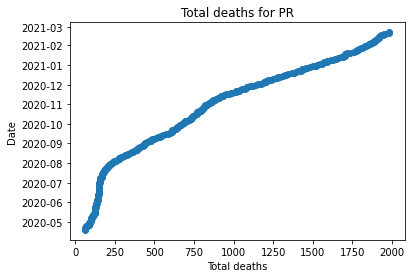

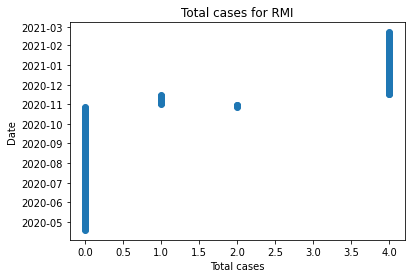

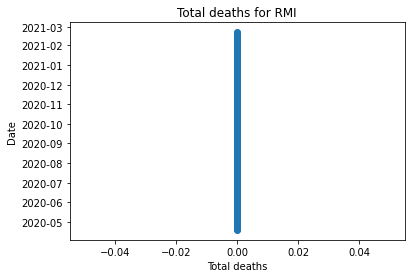

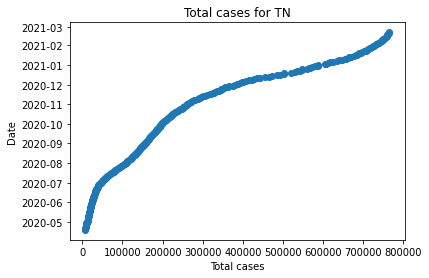

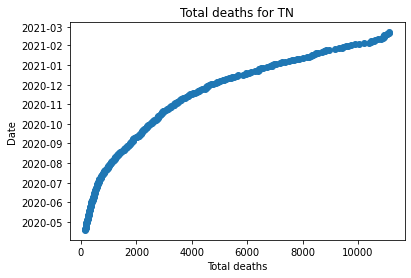

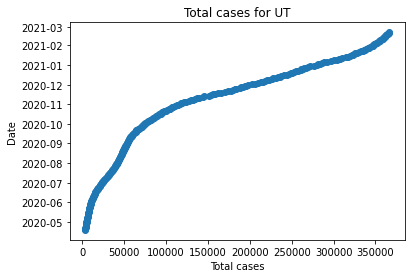

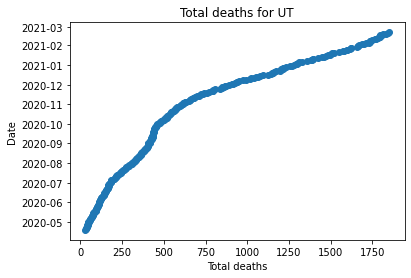

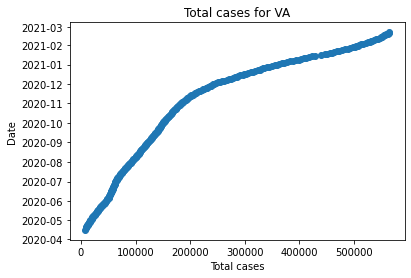

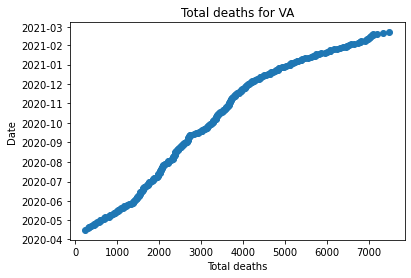

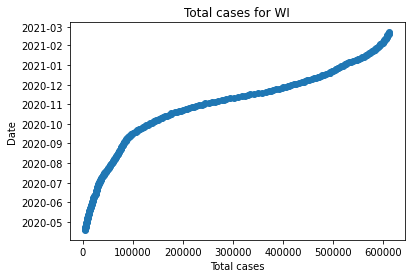

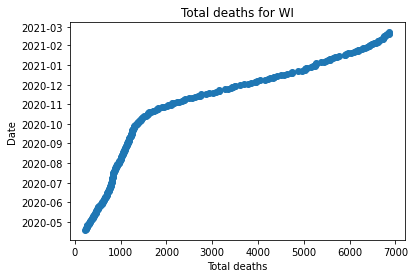

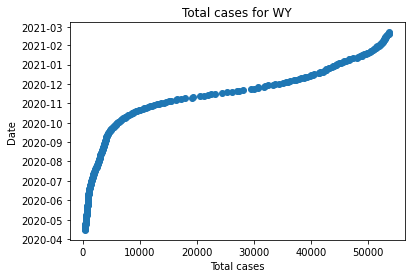

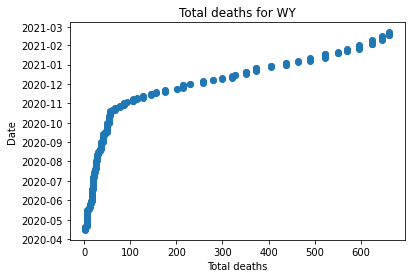

In [ ]:
def graphStates(fieldsLabels):
  for state in covid_19_US_Deaths.sort_values('state')['state'].drop_duplicates():
    for field in fieldsLabels:
      label = fieldsLabels[field]
      rowCount = len(covid_19_US_Deaths[covid_19_US_Deaths['state'] == state])
      rowsForState = covid_19_US_Deaths[covid_19_US_Deaths['state'] == state]
      #print(state + " has " + str(rowCount) + " rows")
      plt.scatter(rowsForState[field], rowsForState['submission_date'])
      plt.xlabel(label)
      plt.ylabel("Date")
      plt.title(label + " for " + state)
      plt.show()

fieldsAndLabels = dict()
fieldsAndLabels.update({"tot_cases":"Total cases"})
fieldsAndLabels.update({"tot_death":"Total deaths"})
graphStates(fieldsAndLabels)


# Pitch / Conclusions
Overall, the pattern for most states is the same: sharp rise of cases and deaths in April and May, then leveling off in the fall and winter of 2020.

First and foremost, to assist with reducing deaths, I recommend a federal ad campaign where each state will take out some time on digital and/or static billboards and other advertising media. The ad in each state will display that state's respective graph, with an arrow pointing to the most current end of the graph with a caption saying something "You are here.", followed by a picture of a hospital and/or cemetary and another caption saying "Don't end up here...". Some places where the small amounts of cases and death yeilded graphs with not much to show (like Republic of the Marshall Islands) may be excluded from this ad campaign.

To reduce the errors and gaps, I recommend an investigation into the places where the errors and gaps are apparently. New Jersey, for example, with the large gap in its data, would be a good place to start. Likewise, the error in the data showing overlapping / conflicting data in Puerto Rico should be looked into to see who retrieved the data, how it was retrieved, and what might have gone wrong in the data retrieval.

# References

1. United States COVID-19 Cases and Deaths by State over Time. United States COVID-19 Cases and Deaths by State over Time | HealthData.gov. https://healthdata.gov/dataset/united-states-covid-19-cases-and-deaths-state-over-time. Published February 23, 2021. Accessed February 24, 2021. 

1. Provisional Death Counts for Coronavirus Disease 2019 (COVID-19). Centers for Disease Control and Prevention. https://www.cdc.gov/nchs/nvss/vsrr/covid19/index.htm. Published February 24, 2021. Accessed February 24, 2021. 